In [1]:
import random
import matplotlib.pyplot as plt

def left_turn1(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0
def left_turn2(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*y2-x1*y3+x2*y3-x2*y1+x3*y1-x3*y2 >= 0
def left_turn3(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*y2+x2*y3+x3*y1-x1*y3-x2*y1-x3*y2 >= 0

def poly_test(n):
    x,y = 0,0
    resx = []
    resy = []
    for i in range(n):
        x += random.uniform(0, 1)
        y = x**2 #<-- also a source of error
        resx.append(x)
        resy.append(y)
    return resx,resy

def left_turn_test(left_turn,xvals,yvals,n):
    #xvals,yvals = poly_test(n)
    errors = 0
    for i in range(n-3):
        if not left_turn( (xvals[i],yvals[i]),(xvals[i+1],yvals[i+1]),(xvals[i+2],yvals[i+2]) ):
            errors += 1
    print(errors,"errors")

n = 1000000
xvals,yvals = poly_test(n)
left_turn_test(left_turn1,xvals,yvals,n)
left_turn_test(left_turn2,xvals,yvals,n)
left_turn_test(left_turn3,xvals,yvals,n)

43 errors
142678 errors
281412 errors


In [2]:
def float_test():
    n = 1
    while 10**(-n) != 10**(-(n+1)):
        n += 1
    print("done",n)
float_test()

done 324


In [3]:
#setup: f1 = m1*2^x1, f2 = m2*2^x2, mi 24 bits, xi 8 bits
#q1: how many bits for f1*f2?
#A1: f1f2 = m1m2*2^(x1+x2), 47 and 9 (sign bit)
#q2: how many bits for f1+f2?
#A2: f1+f2 = m1 2^x1 + m2 2^x2
#2**(23+128) = 2**(151) largest number
#2**(-128) smallest number
#279 in total

In [143]:
"""
Data generation
"""
import random

def generate_circle(n,radius=1):
    """
    Data generated on a circle
    """
    pts = []
    count = 0
    while len(pts) < n:
        x,y = random.uniform(-radius,radius),random.uniform(-radius,radius)
        if x*x+y*y <= radius:
            pts.append((x,y))
        count+=1
    #print(count)
    return pts

def generate_square(n,length=1):
    """
    Data generated on a square
    """
    return [(random.uniform(0, length),random.uniform(0, length)) for i in range(n)]

def generate_poly(n):
    """
    Data generated on the curve y = x**2
    """
    x,y = 0,0
    pts = []
    for _ in range(n):
        x += random.uniform(0, 1)
        y = x**2
        pts.append((x,y))
    return pts

generators = [generate_circle,generate_square,generate_poly]

def plot(random_points,ch):
    plt.plot(*list(zip(*random_points)),"r.")
    plt.plot(*list(zip(*ch)),"g-")
    plt.show()
    
def left_turn(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0

def test_convex_hull(CH_algo,n):
    for generator in generators:
        print(generator.__doc__)
        random_points = generator(n)
        ch = CH_algo(random_points)
        plot(random_points,ch)


    Data generated on a circle
    


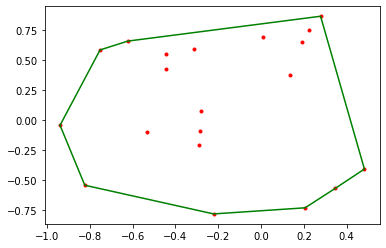


    Data generated on a square
    


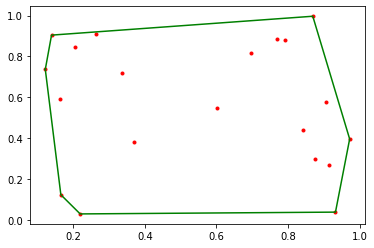


    Data generated on the curve y = x**2
    


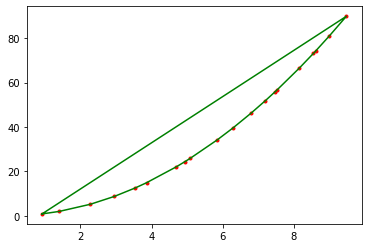

In [144]:
"""
Part A Graham's Scan
"""

def INC_CH(pointss):
    """
    Graham's Scan
    """
    points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper + lower

test_convex_hull(INC_CH,20)


    Data generated on a circle
    


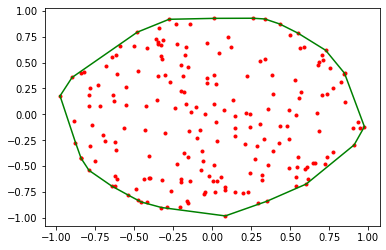


    Data generated on a square
    


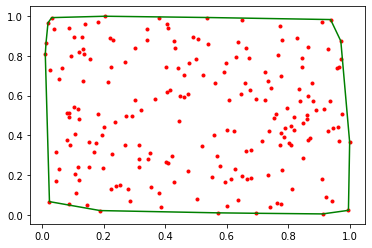


    Data generated on the curve y = x**2
    


In [ ]:
"""
Part B Gift Wrapping
"""

from copy import deepcopy

def GIFT_CH(pts):
    """
    Gift Wrapping
    """
    points = deepcopy(pts)
    p_start = min(points)
    CH = [p_start]
    p_left = p_start
    q = points[0] if points[0] not in CH else points[1]
    while True:
        for z in points:
            if z == q:
                continue
            if not left_turn(p_left,z,q):
                q = z
        CH.append(q)
        if q in points:
            points.remove(q)
        if points:
            p_left = q
            q = points[0]
        if p_left == p_start:
            break
        
    return CH
        
test_convex_hull(GIFT_CH,200)